In [1]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [2]:
import json
import gff3_parsing
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import glob
import statsmodels.stats.multitest as multi

# Stats/Visualization for single bacteria virus pair

In [60]:
host_ids = [36809,\
           717959,\
           305,\
           1590,\
           435591,\
           90371,\
           1314,\
           357276,\
           657318,\
           1639,\
           1428,\
           470,\
           573,\
           1280,\
           287,\
           562,\
           28450]

In [24]:
host_id = 562
p_values = []
viral_means = []
viral_ids = []
sep = "\t"

host_df = pd.read_csv("../Data/host_genomes/{}.clean.tsv".format(host_id), sep = sep)
host_mean = np.mean(host_df["energy_binding"])
print(host_df.shape)
for tsv_file in glob.glob("../Data/{}_rep_viruses/*.clean.tsv".format(host_id)):
    viral_df = pd.read_csv(tsv_file, sep = sep)
    viral_ids.append(tsv_file.split('rep_viruses/')[1].split('.')[0])
    rstat, p_value = stats.ranksums(host_df["energy_binding"], viral_df["energy_binding"])
    p_values.append(p_value)
    viral_means.append(np.mean(viral_df["energy_binding"]))

(4059, 15)


In [51]:
viral_df.columns

Index(['Unnamed: 0', 'genome_id', 'source', 'type', 'start', 'stop', 'idk',
       'strand', 'trash', 'qualifiers', 'coding_sequence', 'upstream_sequence',
       'energy_binding', 'viral_id', 'iCUB'],
      dtype='object')

In [52]:
for host_id in glob.glob('../Data/host_genomes/*.clean.tsv'.format(host_ids)):
    if '28450.1' in host_id:
        continue
    if '28450.2' in host_id:
        continue
    #print(host_id)
    
    

In [84]:
viruses_df = pd.DataFrame(columns = ['virus_id','host_id', 'mean_rbs_energy','p_value'])

In [70]:
viruses_df

,virus_id,host_id,mean_rbs_energy,p_value


In [112]:
hosts_df = pd.DataFrame(columns = ['host_id', 'mean_rbs_energy'])
host_means =[]
viral_ids = []
p_values = []
viral_means = []
host_ids_final = []

for host_id in host_ids:
    
    df = pd.read_csv('../Data/host_genomes/{}.clean.tsv'.format(host_id), sep = sep)
    host_avg = np.mean(df['energy_binding'])
    host_means.append(host_avg)
    
    for tsv_file in glob.glob('../Data/{}_rep_viruses/*.clean.tsv'.format(host_id)):
        
        host_ids_final.append(tsv_file.split('Data/')[1].split('_rep_viruses')[0])
        df_2 = pd.read_csv(tsv_file, sep = sep)
        viral_ids.append(tsv_file.split('rep_viruses/')[1].split('.')[0])
        rstat, p_value = stats.ranksums(df["energy_binding"], df_2["energy_binding"])
        p_values.append(p_value)
        viral_means.append(np.mean(df_2["energy_binding"]))


        
        
        
viruses_df['virus_id'] = viral_ids
viruses_df['mean_rbs_energy'] = viral_means
viruses_df['p_value'] = p_values
viruses_df['host_id'] = host_ids_final
hosts_df['host_id'] = host_ids
hosts_df['mean_rbs_energy'] = host_means



# Export dfs as tsv

In [116]:
location = '../Data/compiled_tsvs/'
viruses_df.to_csv(location + 'all_viruses.tsv', sep = '\t')
hosts_df.to_csv(location + 'all_hosts.tsv', sep = '\t')

In [111]:
hosts_df

,host_id,mean_rbs_energy
0,36809,-3.836585
1,717959,-1.069793
2,305,-3.987150
3,1590,-6.304009
4,435591,-1.099638
5,90371,-4.585393
6,1314,-5.154862
7,357276,-1.004225
8,657318,-5.883323
9,1639,-6.670049


In [28]:
ecoli_df = pd.DataFrame(columns = ['virus_id','host_id', 'mean_rbs_energy','p_value'])

In [34]:
# ecoli_df['virus_id'] = viral_ids
# ecoli_df['host_id'] = host_id
# ecoli_df['mean_rbs_energy'] = viral_means
# ecoli_df['p_value'] = p_values
# ecoli_df

,virus_id,host_id,mean_rbs_energy,p_value
0,6088,562,-5.265690,9.680320e-02
1,6277,562,-5.392679,2.834607e-02
2,2454,562,-6.037500,2.368981e-07
3,3758,562,-5.307647,4.128935e-02
4,6382,562,-5.782353,1.441761e-03
5,197,562,-4.641353,1.753879e-01
6,2797,562,-5.574687,5.346480e-03
7,710,562,-4.987333,5.858007e-01
8,3861,562,-5.116984,4.355309e-01
9,2440,562,-5.495200,8.678338e-03


**Proportion of viruses that are significantly different than host**

In [11]:
significant_pvalues = []
for p in p_values:
    if p <= 0.01:
        significant_pvalues.append(p)
        
print(len(significant_pvalues), len(p_values), len(significant_pvalues)/len(p_values))


25 39 0.6410256410256411


**Visualizing p-values**

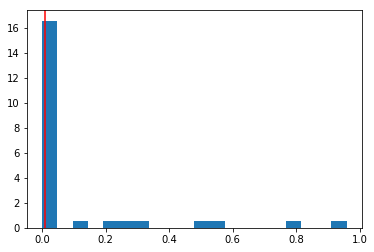

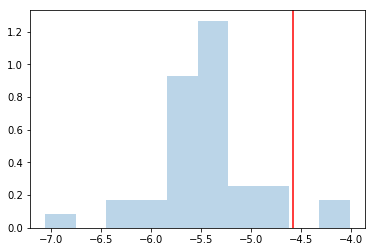

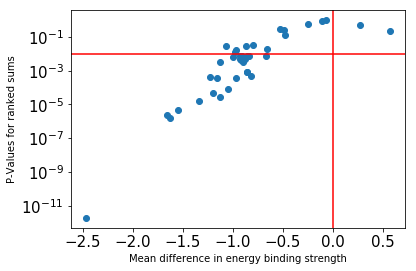

In [12]:
#2
fig, ax = plt.subplots()
ax.hist(p_values, 20, density = True)
ax.axvline(0.01, color = "r")


fig2, ax2 = plt.subplots()
ax2.hist(viral_means, density= True, alpha = 0.3)
ax2.axvline(host_mean, color = "r")

fig3, ax = plt.subplots()
ax.set_ylabel("P-Values for ranked sums")
ax.set_xlabel("Mean difference in energy binding strength")
ax.tick_params(labelsize = 15)
ax.semilogy(np.array(viral_means)-host_mean,p_values, marker = "o", linestyle = "")
ax.axvline(0, color = "r")
ax.axhline(.01, color = "r")

**Correcting for multiple hypotheses**

85 373 0.22788203753351208


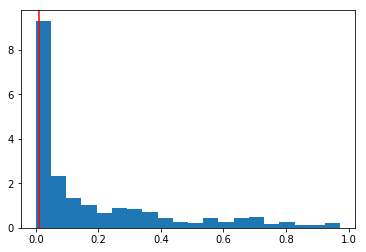

In [7]:
truth_array, corrected_p_values = multi.fdrcorrection(p_values)

fig, ax = plt.subplots()
ax.hist(corrected_p_values, 20, density = True)
ax.axvline(0.01, color = "r")


significant_pvalues = []
for p in corrected_p_values:
    if p <= 0.01:
        significant_pvalues.append(p)
        
print(len(significant_pvalues), len(corrected_p_values), len(significant_pvalues)/len(corrected_p_values))

In [8]:
stats.combine_pvalues(p_values)

(3624.7470661588354, 0.0)

# Stats/Visualization for all bacteria